# Configuration

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install numpy pandas geopandas matplotlib networkx osmnx contextily folium shapely EE 
import networkx as nx # need networkx >= 2.5
import osmnx as ox
import contextily as ctx
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point
import folium
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
import pandas as pd


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# Tasks

In [3]:
hospital_df = gpd.read_file('Hospitals_2025.geojson')
shelters_df = gpd.read_file('Shelters_2025.geojson')
game_grid_df = gpd.read_file('game_grid_2025.geojson')

d1_forecasts = gpd.read_file("day1_forecasts_2025.geojson")
d1_trackpast = gpd.read_file("day1_track_past.geojson")

In [4]:
hospital_df

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,49,0013402908,VA MEDICAL CENTER - PROVIDENCE,830 CHALKSTONE AVE,PROVIDENCE,RI,02908,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.providence.va.gov/,NOT AVAILABLE,NOT AVAILABLE,44,GOVERNMENT - FEDERAL,-999,-999.0,NOT AVAILABLE,N,POINT (-71.43315 41.83214)
1,98,0000502891,WESTERLY HOSPITAL,25 WELLS ST,WESTERLY,RI,02891,NOT AVAILABLE,(401) 596-6000,GENERAL ACUTE CARE,...,http://www.westerlyhospital.org/,6,NOT AVAILABLE,44,NON-PROFIT,-999,125.0,NOT AVAILABLE,N,POINT (-71.8253 41.36219)
2,116,0009802703,ARBOUR FULLER HOSPITAL,200 MAY STREET,ATTLEBORO,MA,02703,NOT AVAILABLE,(508) 761-8500,PSYCHIATRIC,...,http://arbourhealth.com/organizations/arbour-f...,2836,NOT AVAILABLE,25,PROPRIETARY,-999,103.0,NOT AVAILABLE,N,POINT (-71.36112 41.92408)
3,117,0009702146,ARBOUR HUMAN RESOURCE INSTITUTE,227 BABCOCK STREET,BROOKLINE,MA,02146,NOT AVAILABLE,(617) 731-3200,PSYCHIATRIC,...,http://arbourhealth.com/organizations/arbour-h...,2005,NOT AVAILABLE,25,PROPRIETARY,-999,66.0,NOT AVAILABLE,N,POINT (-71.12124 42.35078)
4,120,0003906250,"NATCHAUG HOSPITAL, INC.",189 STORRS RD,MANSFIELD CENTER,CT,06250,NOT AVAILABLE,(860) 456-1311,PSYCHIATRIC,...,http://www.natchaug.org/,NOT AVAILABLE,NOT AVAILABLE,09,NON-PROFIT,-999,57.0,NOT AVAILABLE,N,POINT (-72.19801 41.7411)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,7578,0018971434,TARAVISTA BEHAVIORAL HEALTH CENTER,85 PATTON ROAD,AYER,MA,01434,NOT AVAILABLE,(978) 615-5200,PSYCHIATRIC,...,https://www.taravista.care/,2AY6,NOT AVAILABLE,25,NOT AVAILABLE,-999,108.0,NOT AVAILABLE,N,POINT (-71.61498 42.53026)
347,7609,0196706457,WHITING FORENSIC HOSPITAL,70 OBRIEN DR,MIDDLETOWN,CT,06457,3945,(860) 262-5400,PSYCHIATRIC,...,https://portal.ct.gov/dmhas/wfh/whiting-forens...,NOT AVAILABLE,NOT AVAILABLE,09,GOVERNMENT - STATE,-999,229.0,NOT AVAILABLE,N,POINT (-72.62589 41.55204)
348,7682,0196784161,THE CONNECTICUT HOSPICE INC,100 DOUBLE BEACH RD,BRANFORD,CT,06405,4909,NOT AVAILABLE,GENERAL ACUTE CARE,...,NOT AVAILABLE,67,NOT AVAILABLE,09,NOT AVAILABLE,-999,-999.0,NOT AVAILABLE,NOT AVAILABLE,POINT (-72.83284 41.25681)
349,7723,0196784202,HARTFORD HOSPITAL (INSTITUTE OF LIVING),200 RETREAT AVENUE,HARTFORD,CT,06106,3315,NOT AVAILABLE,GENERAL ACUTE CARE,...,NOT AVAILABLE,46,NOT AVAILABLE,09,NOT AVAILABLE,-999,-999.0,NOT AVAILABLE,NOT AVAILABLE,POINT (-72.68213 41.74967)


In [5]:
shelters_df

,SHELTER_ID,SHELTER_NAME,ADDRESS_1,CITY,COUNTY_PARISH,FIPS_CODE,STATE,ZIP,MAIL_ADDR_SAME_AS_PHYS_ADDR,MAILING_ADDRESS_1,...,SCORE,STATUS,MATCH_TYPE,LOC_NAME,GEOX,GEOY,FACILITY_TYPE,SUBFACILITY_CODE,DATA_SOURCE_ID,geometry
0,218372,Chazy Central School,609 Miner Farm Road,CHAZY,CLINTON,,NY,12921,YES,,...,100.0,M,A,Street,-73.433769,44.887701,SHELTER,GENPOPSHEL,0.0,POINT (-73.43377 44.8877)
1,183805,Ansonia High School,20 Pulaski Hwy,Ansonia,NEW HAVEN,,CT,6401,YES,,...,81.0,M,A,Street,-73.064238,41.329884,SHELTER,GENPOPSHEL,0.0,POINT (-73.06424 41.32988)
2,184071,GRANBY MIDDLE SCHOOL,321 SALMON BROOK ST,GRANBY,HARTFORD,,CT,06035,NO,,...,81.0,M,A,Street,-72.790043,41.956001,SHELTER,GENPOPSHEL,0.0,POINT (-72.79004 41.956)
3,119033,Worcester Senior Center,128 PROVIDENCE ST,WORCESTER,WORCESTER,,MA,01604,NO,,...,81.0,M,A,Street,-71.792237,42.247570,SHELTER,OTHER,0.0,POINT (-71.79224 42.24757)
4,71719,Jefferson Village School,48 Washington Rd,JEFFERSON,LINCOLN,,ME,04348,NO,Box 260,...,81.0,M,A,Street,-69.432074,44.222706,SHELTER,GENPOPSHEL,0.0,POINT (-69.43207 44.22271)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,365208,Conard High School,100 Beecwood Rd,West Hartford,Hartford,None,CT,6106,None,None,...,NaN,None,None,Street,-72.752085,41.735502,SHELTER,EMEREVAC,101.0,POINT (-72.75208 41.7355)
4581,365254,Lewiston High School,156 East Ave,Lewiston,Androscoggin,None,ME,4240,None,None,...,NaN,None,None,Street,-70.202282,44.093143,SHELTER,GENPOPSHEL,101.0,POINT (-70.20228 44.09314)
4582,365358,Weymouth High School (Regional Center),1 Wildcat Way,Weymouth,Norfolk,None,MA,2190,None,None,...,NaN,None,None,Street,-70.942783,42.182527,SHELTER,GENPOPSHEL,101.0,POINT (-70.94278 42.18253)
4583,365363,Holy Trinity Church,1409 Park Ave,Woonsocket,Providence,None,RI,2895,None,None,...,NaN,None,None,Street,-71.516473,41.984584,SHELTER,GENPOPSHEL,101.0,POINT (-71.51647 41.98458)


game_grid_df

In [6]:
game_grid_df

,EASTING,NORTHING,kmSQ_ID,GZD,Shape_Leng,MGRS,MGRS_10km,transport_score,geometry
0,596000mE,4984000mN,WQ,18T,400000.000000,18TWQ9684,18TWQ98,1,"POLYGON ((-73.76921 45.00282, -73.7819 45.0029..."
1,597000mE,4984000mN,WQ,18T,400000.000000,18TWQ9784,18TWQ98,1,"POLYGON ((-73.75653 45.00268, -73.76921 45.002..."
2,598000mE,4984000mN,WQ,18T,400000.000000,18TWQ9884,18TWQ98,1,"POLYGON ((-73.74384 45.00254, -73.75653 45.002..."
3,599000mE,4984000mN,WQ,18T,400000.000000,18TWQ9984,18TWQ98,1,"POLYGON ((-73.73116 45.0024, -73.74384 45.0025..."
4,579000mE,4983000mN,WQ,18T,400000.000000,18TWQ7983,18TWQ78,1,"POLYGON ((-73.98504 44.99594, -73.99773 44.996..."
...,...,...,...,...,...,...,...,...,...
232562,282000mE,4558000mN,BF,19T,0.041828,19TBF8258,19TBF85,1,"POLYGON ((-71.58574 41.14431, -71.59765 41.144..."
232563,283000mE,4558000mN,BF,19T,0.041828,19TBF8358,19TBF85,1,"POLYGON ((-71.57384 41.14458, -71.58574 41.144..."
232564,284000mE,4558000mN,BF,19T,0.041828,19TBF8458,19TBF85,1,"POLYGON ((-71.56193 41.14484, -71.57384 41.144..."
232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1,"POLYGON ((-71.55003 41.14511, -71.56193 41.144..."


The `game_grid_df` contains 232,567 rows and 9 columns. It includes spatial data with columns such as `EASTING`, `NORTHING`, `kmSQ_ID`, `GZD`, `Shape_Leng`, `MGRS`, `MGRS_10km`, and `geometry`. Let me know if you need specific details or operations on this dataset.

In [7]:
game_grid_df['transport_score'].value_counts()

transport_score
1     112904
7      51318
2      36253
10     23455
3       7832
4        805
Name: count, dtype: int64

In [8]:
game_grid_df.plot(
    column='transport_score',
    cmap='viridis',           
    edgecolor='black',
    legend=True,
    figsize=(10, 10)
)

plt.title("Game Grid by Transport Score")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

The plot has been generated successfully, displaying the game grid by transport score using the 'viridis' colormap. Let me know if you need further analysis or adjustments.

Convert Game Grid into routing network (provided)
Travel time in minutes between two cells x, y: T(x,y) = 20/(x.transport_score + y.transport_score)
Each grid cell can be connected only to immediate neighbors (up to 8: NW, N, NE, E, SE, S, SW, W)

In [9]:

# G = nx.Graph()
# for idx, row in game_grid_df.iterrows():
#     G.add_node(idx, transport_score=row['transport_score'], geometry=row.geometry)

# adj = gpd.sjoin(game_grid_df, game_grid_df, how="inner", predicate='touches')

# adj = adj.reset_index()

# adj = adj.rename(columns={'index': 'index_left', 'index_right': 'index_right'}) 

# print(adj.columns)
# adj = adj[adj['index_left'] < adj['index_right']] 

# for i, j in zip(adj['index_left'], adj['index_right']):
#     s_i = game_grid_df.at[i, 'transport_score']
#     s_j = game_grid_df.at[j, 'transport_score']
#     G.add_edge(i, j, weight=20.0 / (s_i + s_j))

# print(len(game_grid_df))
# print(G.number_of_nodes())
# print(G.number_of_edges())
# adj["index_left"].value_counts()

# # nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'geometry'), node_color=nx.get_node_attributes(G, 'transport_score'), node_size=10)

Index(['index_left', 'EASTING_left', 'NORTHING_left', 'kmSQ_ID_left',
       'GZD_left', 'Shape_Leng_left', 'MGRS_left', 'MGRS_10km_left',
       'transport_score_left', 'geometry', 'index_right', 'EASTING_right',
       'NORTHING_right', 'kmSQ_ID_right', 'GZD_right', 'Shape_Leng_right',
       'MGRS_right', 'MGRS_10km_right', 'transport_score_right'],
      dtype='object')
232567
232567
1302971


In [33]:
print(game_grid_df.iloc[1]["EASTING"])

597000mE


In [71]:
G = nx.Graph()
for idx, row in game_grid_df.iterrows():
    G.add_node(idx, transport_score=row['transport_score'], geometry = row.geometry)

dirs = {
    "N":  (0, 1000),
    "NE": (1000, 1000),
    "E":  (1000, 0),
    "SE": (1000, -1000),
    "S":  (0, -1000),
    "SW": (-1000, -1000),
    "W":  (-1000, 0),
    "NW": (-1000, 1000),
}
# print(dirs["N"])
for curr_index in range(len(game_grid_df)):
    for potential_index in range(len(game_grid_df)): 
        for key in dirs.keys():
            # print(type(current_node))
            # print(type(potential_node))
            changex = dirs[key][0]
            changey = dirs[key][1]
            if(int(game_grid_df.iloc[curr_index]["EASTING"][:-2])+changex==int(game_grid_df.iloc[potential_index]["EASTING"][:-2]) and int(game_grid_df.iloc[curr_index]["NORTHING"][:-2])+changey==int(game_grid_df.iloc[potential_index]["NORTHING"][:-2])):
                trans1 = game_grid_df.iloc[curr_index]["transport_score"]
                trans2 = game_grid_df.iloc[potential_index]["transport_score"]
                G.add_edge(curr_index,potential_index,weight = 20.0/(trans1+trans2))
print(len(game_grid_df))
print(G.number_of_nodes())
print(G.number_of_edges())

print(G.edges)
# for i in range(8):


KeyboardInterrupt: 

In [ ]:
#Thinh
sample_game_grid_df = game_grid_df.head(5000)
potential_nodes = sample_game_grid_df['MGRS'].tolist()

myGraph = nx.Graph()

for my_node in potential_nodes:
    x_coordinate = my_node[-2:]
    y_coordinate = my_node[-4:-2]

/root/venv/lib/python3.10/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 114 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


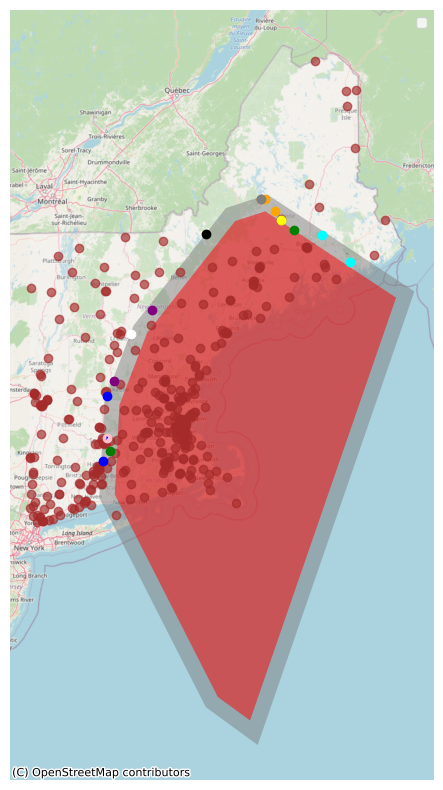

In [76]:
grid_merc = game_grid_df.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grid_merc.plot(ax=ax, color='white', alpha=0.3)

perimeter = d1_forecasts.to_crs(epsg=3857).geometry.union_all().convex_hull
gpd.GeoSeries([perimeter]).plot(ax=ax, color='gray', alpha=0.5)
inner_perimeter = perimeter.buffer(-32180) #20 miles
gpd.GeoSeries([inner_perimeter]).plot(ax=ax, color='red', alpha=0.5)

#shelters_df.to_crs(epsg=3857).plot(ax=ax, color='green', alpha = 0.5)
hospital_df.to_crs(epsg=3857).plot(ax=ax, color='brown', alpha = 0.65)
#d1_forecasts.to_crs(epsg=3857).plot(ax=ax, color='blue', alpha=0.8)

#d1_trackpast.to_crs(epsg=3857).plot(ax=ax, color='yellow')

westover_airbase = gpd.GeoDataFrame(geometry=[Point(-72.5436, 42.1991)], crs='EPSG:4326')
westover_airbase = westover_airbase.to_crs(epsg=3857)
westover_airbase.plot(ax=ax, color='pink')

grid_wgs = game_grid_df.to_crs(epsg=4326)
poly = grid_wgs.geometry.union_all()
tags = {'aeroway' :  'aerodrome'}
airfields = ox.features_from_polygon(poly, tags=tags)
airfields_merc = airfields.to_crs(epsg=3857)
distr_cntrs = airfields_merc[airfields_merc.within(perimeter)]
distr_cntrs = distr_cntrs[~distr_cntrs.within(inner_perimeter)]  
distr_cntrs = distr_cntrs[~distr_cntrs['name'].str.contains('Seaplane', case=False, na=False)]
colors = ['purple', 'blue', 'green', 'orange', 'cyan', 'yellow', 'black', 'white', 'gray']
for i in range(len(distr_cntrs)):
    index = i % len(colors)
    distr_cntrs.iloc[i:i+1].plot(ax=ax, color=colors[index])
#distr_cntrs = distr_cntrs.iloc[list(range(7,8)) + list(range(6,7)) + list(range(8,9)) + list(range(9,10))]
#distr_cntrs = pd.concat([distr_cntrs, westover_airbase], ignore_index=True)
#distr_cntrs.loc[4, 'name'] = "Westover Air Reserve Base"
#distr_cntrs.iloc[0:1].plot(ax=ax, color='purple')
#distr_cntrs.iloc[1:2].plot(ax=ax, color='blue')
#distr_cntrs.iloc[2:3].plot(ax=ax, color='green')
#distr_cntrs.iloc[3:4].plot(ax=ax, color='orange')
#distr_cntrs.iloc[4:5].plot(ax=ax, color='pink')
#distr_cntrs.plot(ax=ax, color='yellow')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.legend()

plt.show()

In [82]:

display(distr_cntrs.iloc[3:4])
display(distr_cntrs.iloc[12:13])

,,geometry,addr:state,aeroway,ele,gnis:feature_id,name,wikidata,faa:lid,addr:city,addr:postcode,...,contact:youtube,start,internet_access:fee,length,comment,international_flights,loc_ref,elevation,wikimedia_commons,name:ko
element,id,,,,,,,,,,,,,,,,,,,,,
node,369071660,POINT (-7742523.959 5694768.482),ME,aerodrome,425,581981,Greenville Municipal Airport,Q3913695,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,,geometry,addr:state,aeroway,ele,gnis:feature_id,name,wikidata,faa:lid,addr:city,addr:postcode,...,contact:youtube,start,internet_access:fee,length,comment,international_flights,loc_ref,elevation,wikimedia_commons,name:ko
element,id,,,,,,,,,,,,,,,,,,,,,
node,7549447304,POINT (-7719840.353 5669652.478),ME,aerodrome,107,582248,Two Falls Airport,Q35313827,NaN,Willimantic,04443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
!pip install io

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [15]:
!pip install StringIO

ERROR: Could not find a version that satisfies the requirement StringIO (from versions: none)
ERROR: No matching distribution found for StringIO

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [36]:
#Imports libraries used
import ee
import folium
from IPython.display import display

#Only maps population density for New England (from Google Earth Engine)
states = (ee.FeatureCollection("TIGER/2018/States").filter(ee.Filter.inList('NAME', ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut'])))
ne_union = states.union()

#Loads the GPWv4 density ImageCollection from Earth Engine and clips to New England region
pop_col = ee.ImageCollection('CIESIN/GPWv411/GPW_Population_Density')
pop2020 = (pop_col
      .filterDate('2020-01-01', '2021-01-01')
      .first()
      .select('population_density')
)
pop_ne = pop2020.clip(ne_union)

#Renders with Folium
map = folium.Map(location=[43.5, -71.5], zoom_start=6)
vis_params = {'min': 0, 'max': 1000,'palette': ['ffffff','a1dab4','41b6c4','2c7fb8','253494']}

# Fix: Ensure Earth Engine is initialized before using it
try:
    ee.Initialize()
except Exception as e:
    print("Error initializing Earth Engine: ", e)

map_id = pop_ne.getMapId(vis_params)
folium.TileLayer(tiles=map_id['tile_fetcher'].url_format, attr='Google Earth Engine', name='2020 Pop Density (NE)', overlay=True, control=True).add_to(map)

# Display the map
display(map)

ModuleNotFoundError: No module named 'StringIO'

/tmp/ipykernel_534/1999876466.py:21: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly = grid_wgs.unary_union
/root/venv/lib/python3.10/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 114 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/tmp/ipykernel_534/1999876466.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  farthest_idx = candidates.geometry.distance(selection.unary_union).idxmax()
/tmp/ipykernel_534/1999876466.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  farthest_idx = candidates.geometry.distance(selection.unary_union).idxmax()
/tmp/ipykernel_534/1999876466.py:33: DeprecationWarning: The 'unary_union' attr

NameError: name 'nodeData' is not defined

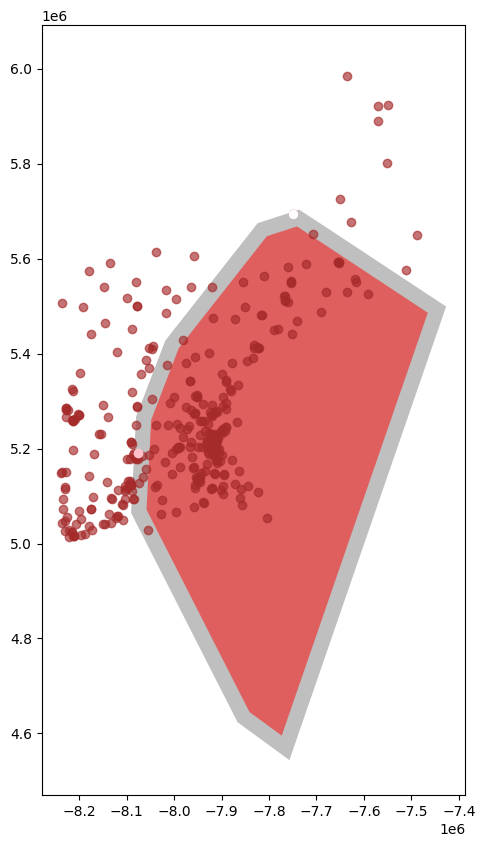

In [167]:
grid_merc = game_grid_df.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grid_merc.plot(ax=ax, color='white', alpha=0.3)

perimeter = d1_forecasts.to_crs(epsg=3857).union_all().convex_hull
gpd.GeoSeries(perimeter).plot(ax=ax, color='gray', alpha=0.5)
inner_perimeter = perimeter.buffer(-32180) #20 miles
gpd.GeoSeries(inner_perimeter).plot(ax=ax, color='red', alpha=0.5)

#shelters_df.to_crs(epsg=3857).plot(ax=ax, color='green', alpha = 0.5)
hospital_df.to_crs(epsg=3857).plot(ax=ax, color='brown', alpha = 0.65)
#d1_forecasts.to_crs(epsg=3857).plot(ax=ax, color='blue', alpha=0.8)

#d1_trackpast.to_crs(epsg=3857).plot(ax=ax, color='yellow')

westover_airbase = gpd.GeoDataFrame(geometry=[Point(-72.5436, 42.1991)], crs='EPSG:4326')
westover_airbase = westover_airbase.to_crs(epsg=3857)
westover_airbase.plot(ax=ax, color='pink')

grid_wgs = game_grid_df.to_crs(epsg=4326)
poly = grid_wgs.unary_union
tags = {'aeroway' : 'aerodrome'}
airfields = ox.features_from_polygon(poly, tags=tags)
airfields_merc = airfields.to_crs(epsg=3857)
distr_cntrs = airfields_merc[airfields_merc.within(perimeter)]
distr_cntrs = distr_cntrs[~distr_cntrs.within(inner_perimeter)]
distr_cntr_0 = distr_cntrs.iloc[0]

selection = westover_airbase.copy()
candidates = distr_cntrs.copy()
for i in range(4):
    if not candidates.empty:
        farthest_idx = candidates.geometry.distance(selection.unary_union).idxmax()
        #selection = pd.concat([selection, candidates.loc[[farthest_idx]]])
        candidates = candidates.drop(farthest_idx)

four_airfields = selection.iloc[1:]
four_airfields.plot(ax=ax, color='white')
print("\n map of chosen distribution centers to nodes")

chosenCopy = selection.copy()
chosenCopy["node id"] = None 
for _, row in chosenCopy.iterrows():
    geom = row.geometry
    closest = None
    min = float('inf')

    for i, v in G.nodes(data=True):
        nodeGeom = v.geometry

        dist = nodeGeom.distance(geom)
        if dist < min:
            min = dist
            closest = i

    chosenCopy.at['node_id'] = closest
    print(f"'{row.get('name', 'Nameless')}' mapped to Gnode: {closest} (dist: {min:.2f} m)")



distr_cntrs.plot(ax=ax, color='purple')
distr_cntr_0.plot(ax=ax, color='blue')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2dcc0f2a-2908-4fb2-84a7-f396276d2cf8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>